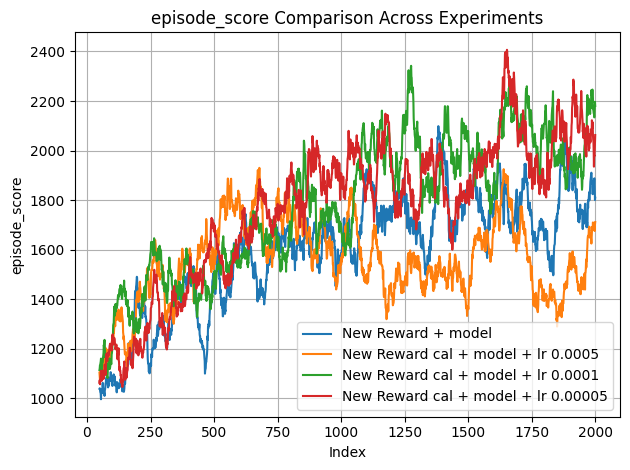

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV files
df1 = pd.read_csv(r'output\DQN_policy_exp3_1024\train_log.csv')
df2 = pd.read_csv(r'output\DQN_policy_exp4\train_log.csv')
df3 = pd.read_csv(r'output\DQN_policy_exp1_new_reward\train_log.csv')
df4 = pd.read_csv(r'output\DQN_policy_exp2_new_reward_lr0.0005\train_log.csv')
df5 = pd.read_csv(r'output\DQN_policy_exp2_new_reward_lr0.00005\train_log.csv')

window = 50
# Plot all loss curves on the same figure
# plt.plot(df1['episode_score'].rolling(window=window).mean(), label='Old Reward + model')
plt.plot(df2['episode_score'].rolling(window=window).mean(), label='New Reward + model')
plt.plot(df4['episode_score'].rolling(window=window).mean(), label='New Reward cal + model + lr 0.0005')
plt.plot(df3['episode_score'].rolling(window=window).mean(), label='New Reward cal + model + lr 0.0001')
plt.plot(df5['episode_score'].rolling(window=window).mean(), label='New Reward cal + model + lr 0.00005')


plt.xlabel('Index')
plt.ylabel('episode_score')
plt.title('episode_score Comparison Across Experiments')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



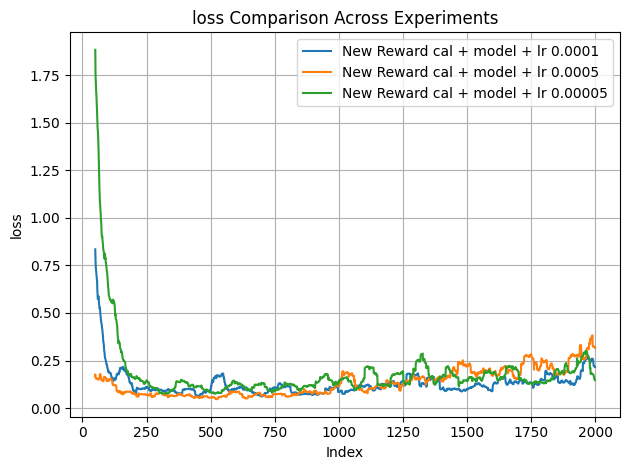

In [33]:
window = 50
# Plot all loss curves on the same figure
# plt.plot(df1['loss'].rolling(window=window).mean(), label='Old Reward + model')
# plt.plot(df2['loss'].rolling(window=window).mean(), label='New Reward + model')
plt.plot(df3['loss'].rolling(window=window).mean(), label='New Reward cal + model + lr 0.0001')
plt.plot(df4['loss'].rolling(window=window).mean(), label='New Reward cal + model + lr 0.0005')
plt.plot(df5['loss'].rolling(window=window).mean(), label='New Reward cal + model + lr 0.00005')


plt.xlabel('Index')
plt.ylabel('loss')
plt.title('loss Comparison Across Experiments')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


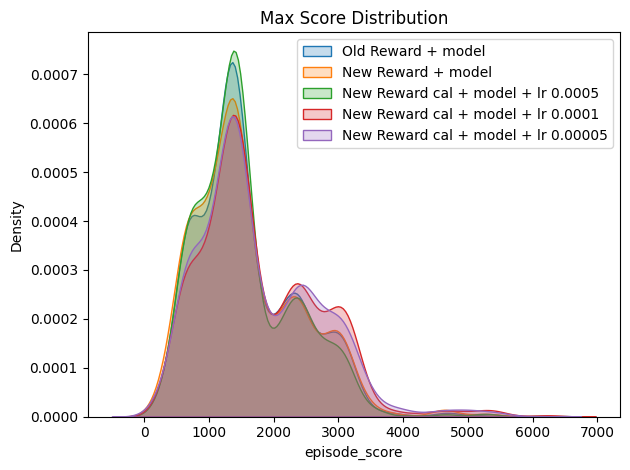

In [37]:
# Plot histogram
import seaborn as sns

sns.kdeplot(df1['episode_score'], label='Old Reward + model', fill=True)
sns.kdeplot(df2['episode_score'], label='New Reward + model', fill=True)
sns.kdeplot(df4['episode_score'], label='New Reward cal + model + lr 0.0005', fill=True)
sns.kdeplot(df3['episode_score'], label='New Reward cal + model + lr 0.0001', fill=True)
sns.kdeplot(df5['episode_score'], label='New Reward cal + model + lr 0.00005', fill=True)

plt.xlabel('episode_score')
plt.ylabel('Density')
plt.title('Max Score Distribution')
plt.legend()
plt.tight_layout()
plt.show()

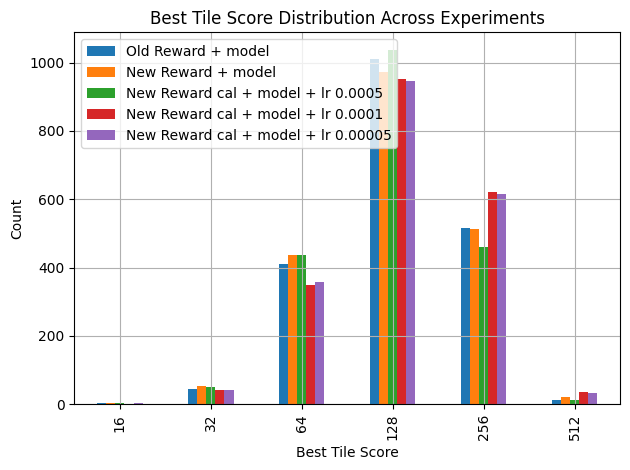

In [36]:
# Read CSVs

# Get value counts
counts1 = df1['best_tile_score'].value_counts().sort_index()
counts2 = df2['best_tile_score'].value_counts().sort_index()
counts3 = df3['best_tile_score'].value_counts().sort_index()
counts4 = df4['best_tile_score'].value_counts().sort_index()
counts5 = df5['best_tile_score'].value_counts().sort_index()

# Combine into a DataFrame
all_scores = sorted(set(counts1.index).union(counts2.index).union(counts3.index).union(counts4.index).union(counts5.index))
combined = pd.DataFrame({
    'Old Reward + model': counts1.reindex(all_scores, fill_value=0),
    'New Reward + model': counts2.reindex(all_scores, fill_value=0),
    'New Reward cal + model + lr 0.0005': counts4.reindex(all_scores, fill_value=0),
    'New Reward cal + model + lr 0.0001': counts3.reindex(all_scores, fill_value=0),
    'New Reward cal + model + lr 0.00005': counts5.reindex(all_scores, fill_value=0),
})

# Plot grouped bar chart
combined.plot(kind='bar')
plt.xlabel('Best Tile Score')
plt.ylabel('Count')
plt.title('Best Tile Score Distribution Across Experiments')
plt.grid(True)
plt.tight_layout()
plt.show()
